# Figure 7
---

This notebook generate a purpose specific figure that includes times series plots for the glaciers, Helheim, Jakobshavn, and Kangerdlugssuaq. It is not meant to be tutorial in nature. Tutorials for the packages used to create the plots can be found [here](https://github.com/fastice/GrIMPTools).

In [49]:
%load_ext autoreload
%autoreload 2
import grimpfunc as grimp
import nisardev as nisar
import panel as pn
pn.extension()
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import dask
from dask.diagnostics import ProgressBar
ProgressBar().register()
dask.config.set(num_workers=1)
import matplotlib.gridspec as gridspec
import pyproj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Use Dropbox for Products Not Available Online

Set up paths.

In [37]:
urlPath = 'https://www.dropbox.com/scl/fo/jwyfunl87lbx3jkpw6cp9/h'
urlAll = f'{urlPath}/all/GL_vel_mosaic_Annual_01Dec20_30Nov21_*_v03.0'
urlPhase = f'{urlPath}/phaseOnly/GL_vel_mosaic_Annual_01Dec20_30Nov21_*_v03.0'
suffix = '?dl=1&rlkey=8t3qewuk5h3q3jbtws1d1y7aw'

Read the full map

In [38]:
print(urlAll+ suffix)
allMap =  nisar.nisarVelSeries() # Create Series
allMap.readSeriesFromTiff([urlAll], url=False, readSpeed=False, overviewLevel=2, suffix=suffix) 
allMap.loadRemote()
print(allMap.sx, allMap.sy)

https://www.dropbox.com/scl/fo/jwyfunl87lbx3jkpw6cp9/h/all/GL_vel_mosaic_Annual_01Dec20_30Nov21_*_v03.0?dl=1&rlkey=8t3qewuk5h3q3jbtws1d1y7aw
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
948 1712


Read the phase only map.

In [39]:
print(urlPhase)
phaseMap = nisar.nisarVelSeries() # Create Series
phaseMap.readSeriesFromTiff([urlPhase], url=False, readSpeed=False, overviewLevel=2, suffix=suffix) 
phaseMap.loadRemote()

https://www.dropbox.com/scl/fo/jwyfunl87lbx3jkpw6cp9/h/phaseOnly/GL_vel_mosaic_Annual_01Dec20_30Nov21_*_v03.0
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s


## Read GPS Points

Read GPS point locations to include on plot.

In [50]:
lltoxy = pyproj.Transformer.from_crs( 4326,  3413)
with open('NEGIS-GPS.txt', 'r') as fp:
   points = np.array([[x.split()[0], x.split()[1]] for x in fp if len(x) > 40])
print(points.shape)
xgps, ygps = lltoxy.transform(points[:,0],points[:,1])

(63, 2)


Generate the side by side plot with phase on the left and full map on the right.

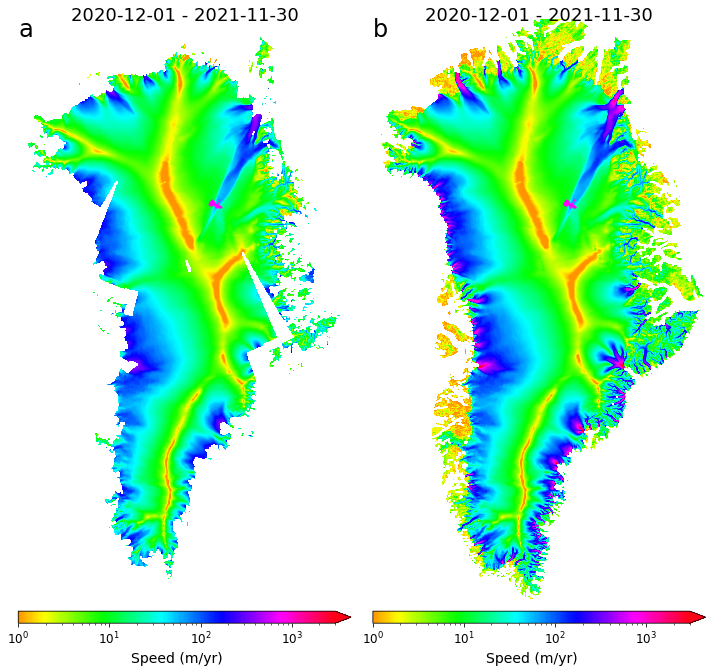

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))
for map, ax in zip([phaseMap, allMap], axes.flatten()):
    map.displayVelForDate(scale='log', vmin=1, vmax=3000, units='km', ax=ax, midDate=False, colorBarPosition='bottom',axisOff=True, colorBarSize='2%')
    ax.set_title(ax.get_title(), y=1,pad=-14, fontsize=18)
for ax in axes:
    ax.plot(xgps*0.001, ygps*0.001,'.', color='magenta', markersize=2)
axes[0].text(0.00, 0.95, 'a', transform=axes[0].transAxes, fontsize=24)
axes[1].text(0.0, 0.95, 'b', transform=axes[1].transAxes, fontsize=24)

fig.tight_layout()
fig.savefig('Figure7.jpg', dpi=200, bbox_inches='tight')

In [22]:
help(f)

No Python documentation found for '2017-12-01 - 2018-11-30'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.

